In [392]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [393]:
###
from keras.datasets import fashion_mnist

In [394]:
fashion_dict = {0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankel boot",
}

In [395]:
### optimizers

# Adagrad, Adam, RMSprop, SGD, Nadam 5가지 주로 사용

In [396]:
# dir(keras.optimizers)
# dir(keras.optimizers.Optimizer)

In [466]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras import initializers
from keras.optimizers import Adam, RMSprop, SGD, Adagrad, Nadam
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

In [485]:
from keras.datasets import fashion_mnist, cifar10

In [486]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [487]:
### train_test_split 함수 직접 만들기
def train_test_split_f(x,y,size=.25):
    length = len(x)
    test_size = int(length*(1-size))
    train_ind = np.random.choice(np.arange(length), test_size, replace=False)
    test_ind = [idx for idx in np.arange(length) if idx not in train_ind]
    return x[train_ind], x[test_ind], y[train_ind], y[test_ind]

In [488]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [489]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45000, 28, 28)
(45000,)
(10000, 28, 28)
(10000,)


In [490]:
X_train, X_val, y_train, y_val = train_test_split_f(X_train_full, y_train_full)

In [491]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45000, 28, 28)
(45000,)
(10000, 28, 28)
(10000,)


In [472]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [473]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
print(input_shape)
print(output_shape)

(28, 28)
10


In [474]:
### 모델 수정

In [475]:
model = Sequential()
input_ = Flatten(input_shape=input_shape)
l1 = Dense(1024,activation="relu")
l2 = Dense(512,activation="relu")
l3 = Dense(256,activation="relu")
output_ = Dense(output_shape,activation="softmax")

model.add(input_)
model.add(l1)
model.add(l2)
model.add(l3)
model.add(output_)

In [476]:
opt = [Adam(), RMSprop(), SGD(), Adagrad(), Nadam()]
loss = CategoricalCrossentropy()
metrics = ["accuracy"]
model.compile(optimizer=opt[0],
                loss = loss,
                metrics=metrics)

In [477]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=1000,
                    validation_data=(X_val,y_val))

Epoch 1/20
45/45 [==============================] - 4s 74ms/step - loss: 0.5315 - accuracy: 0.8143 - val_loss: 0.6217 - val_accuracy: 0.7977
Epoch 2/20
45/45 [==============================] - 3s 70ms/step - loss: 0.3240 - accuracy: 0.8807 - val_loss: 0.4654 - val_accuracy: 0.8425
Epoch 3/20
45/45 [==============================] - 3s 71ms/step - loss: 0.2793 - accuracy: 0.8955 - val_loss: 0.3808 - val_accuracy: 0.8653
Epoch 4/20
45/45 [==============================] - 3s 68ms/step - loss: 0.2561 - accuracy: 0.9051 - val_loss: 0.4275 - val_accuracy: 0.8412
Epoch 5/20
45/45 [==============================] - 3s 68ms/step - loss: 0.2372 - accuracy: 0.9098 - val_loss: 0.3599 - val_accuracy: 0.8697
Epoch 6/20
45/45 [==============================] - 3s 70ms/step - loss: 0.2229 - accuracy: 0.9164 - val_loss: 0.4138 - val_accuracy: 0.8466
Epoch 7/20
45/45 [==============================] - 3s 74ms/step - loss: 0.2103 - accuracy: 0.9208 - val_loss: 0.3655 - val_accuracy: 0.8720
Epoch 8/20
45

In [ ]:
### 정규화 전

In [463]:
opts = {"adam":Adam(), 
        "rmsprop":RMSprop(), 
        "sgd":SGD(), 
        "adagrad":Adagrad(), 
        "nadam":Nadam()}
loss = CategoricalCrossentropy()
metrics = ["accuracy"]

W1 = [model.layers[1].get_weights()[0], model.layers[1].get_weights()[1]] 
W2 = [model.layers[2].get_weights()[0], model.layers[2].get_weights()[1]] 
W3 = [model.layers[3].get_weights()[0], model.layers[3].get_weights()[1]] 
W4 = [model.layers[4].get_weights()[0], model.layers[4].get_weights()[1]] 

val_loss = {}
for opt_name, opt in opts.items():
        model.layers[1].set_weights(W1)
        model.layers[2].set_weights(W2)
        model.layers[3].set_weights(W3)
        model.layers[4].set_weights(W4)
        model.compile(optimizer=opt,
                        loss =loss,
                        metrics=metrics)

        history = model.fit(X_train,
                        y_train,
                        epochs=20,
                        batch_size=1000,
                        validation_data=(X_val,y_val),
                        verbose=0)
        val_loss[opt_name] = history.history['val_loss']

adam 0.37530460953712463
rmsprop 0.37884676456451416
sgd nan
adagrad 0.4031490981578827
nadam 0.3504478633403778


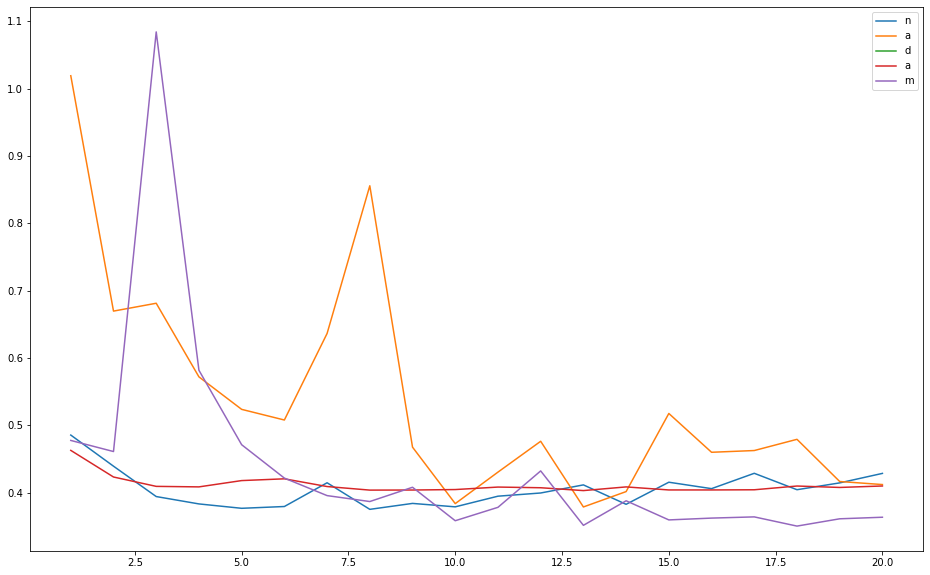

In [464]:
plt.figure(figsize=(16,10))
for k, v in val_loss.items():
    plt.plot(np.arange(1,21),v)
    plt.legend(k)
    print(k,min(v))
plt.show()

### 정규화 후(BatchNormalization)

In [ ]:
model = Sequential()
input_ = Flatten(input_shape=input_shape)
l1 = Dense(1024,activation="relu",
            kernel_initializer = initializers.glorot_normal(seed=None))
nr1 = BatchNormalization()
l2 = Dense(512,activation="relu")
l3 = Dense(256,activation="relu")
output_ = Dense(output_shape,activation="softmax")

model.add(input_)
model.add(l1)
model.add(nr1)
model.add(l2)
model.add(l3)
model.add(output_)

In [478]:
opts = {"adam":Adam(), 
        "rmsprop":RMSprop(), 
        "sgd":SGD(), 
        "adagrad":Adagrad(), 
        "nadam":Nadam()}
loss = CategoricalCrossentropy()
metrics = ["accuracy"]

W1 = [model.layers[1].get_weights()[0], model.layers[1].get_weights()[1]] 
W2 = [model.layers[3].get_weights()[0], model.layers[3].get_weights()[1]] 
W3 = [model.layers[4].get_weights()[0], model.layers[4].get_weights()[1]] 
W4 = [model.layers[5].get_weights()[0], model.layers[5].get_weights()[1]] 

val_loss = {}
for opt_name, opt in opts.items():
        model.layers[1].set_weights(W1)
        model.layers[3].set_weights(W2)
        model.layers[4].set_weights(W3)
        model.layers[5].set_weights(W4)
        model.compile(optimizer=opt,
                        loss =loss,
                        metrics=metrics)

        history = model.fit(X_train,
                        y_train,
                        epochs=20,
                        batch_size=1000,
                        validation_data=(X_val,y_val),
                        verbose=0)
        val_loss[opt_name] = history.history['val_loss']

adam 0.4445634186267853
rmsprop 0.41947299242019653
sgd 0.3735811710357666
adagrad 0.3835180401802063
nadam 0.43501102924346924


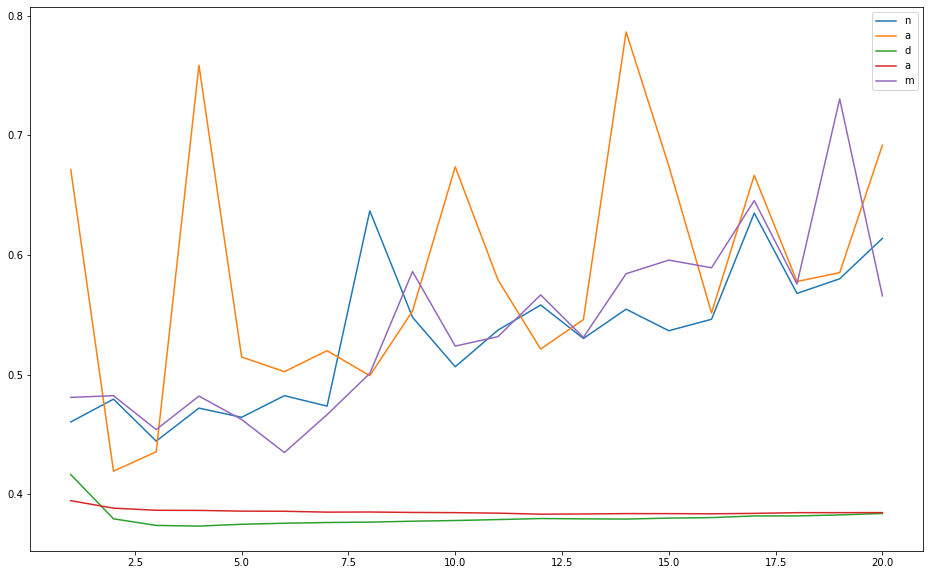

In [479]:
plt.figure(figsize=(16,10))
for k, v in val_loss.items():
    plt.plot(np.arange(1,21),v)
    plt.legend(k)
    print(k,min(v))
plt.show()